## Customer Churn Prediction

## Executive Summary

This project explores customer churn prediction using the Telco Customer Churn dataset. The primary objective was to identify which customers are at risk of leaving the company and understand the key factors driving churn. After thorough data cleaning and exploration, two predictive models were developed: Logistic Regression and Random Forest. The Logistic Regression model achieved high recall (79%), making it effective at catching churners, while the Random Forest model improved precision (65%) and overall accuracy (79%). Key drivers of churn included short customer tenure, high monthly and total charges, fiber optic internet service, and shorter contract terms. These insights can be used to support targeted retention strategies and guide improvements in service offerings and customer experience.


## Dataset Overview

This dataset contains 7,043 records representing customers of a fictional telecom provider. It includes demographic information, service subscriptions, billing details, and whether the customer eventually left the company. The goal is to predict the `Churn` column, which is a binary classification target.

Key columns include:

- `customerID`: Unique identifier for each customer
- `tenure`: Number of months the customer has stayed with the company
- `MonthlyCharges` and `TotalCharges`: Billing-related variables
- `Contract`: Type of customer contract (e.g., Month-to-month, One year, Two year)
- `InternetService`: Type of internet service (e.g., DSL, Fiber optic, None)
- `PaymentMethod`: How the customer pays (e.g., bank transfer, credit card)
- `Churn`: Target variable indicating whether the customer has left (`Yes`) or not (`No`)


## Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Data Loading & Exploration

In [ ]:
df = pd.read_csv("Telco_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Types and Structure


In [9]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

### Summary Statistics

In [11]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Missing Values Check


In [13]:
df.isnull().sum().sort_values(ascending = False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

### Unique Values in Binary Columns

In [15]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for col in binary_cols:
    print(f"{col}: {df[col].unique()}")


Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Churn: ['No' 'Yes']


### Checking SeniorCitizen Values

The `SeniorCitizen` column is a binary variable currently encoded as `0` for non-senior and `1` for senior. Since other binary columns in the dataset use `"Yes"` and `"No"` instead of numeric values, we will later convert this column to match that format for consistency.


In [17]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

### Identifying Blank String Entries in TotalCharges

The `TotalCharges` column should contain numeric values but includes 11 rows with blank strings. These customers all have a `tenure` of 0, indicating they are new customers who have not been billed yet. These rows will need to be addressed before converting the column to numeric.


In [19]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Data Types Check

This check confirms that `TotalCharges` is still an object type and needs conversion. The other columns are mostly categorical (object) or binary. Only `tenure` and `MonthlyCharges` are currently numeric.


In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Exploration Summary

**Key data quality issues identified during the exploration phase:**

- **`SeniorCitizen` column**  
  Convert `0` and `1` values to `"No"` and `"Yes"` to match the binary style used in other columns.

- **`TotalCharges` column**  
  This column had a data type of `object` due to blank strings. Convert it to numeric and handle resulting `NaN` values.

- **`tenure` column**  
  New customers with 0 tenure have no usage history, which explains the blank entries in the `TotalCharges` column. These rows can be removed.

- **`MultipleLines` column**  
  The `"No phone service"` response should be standardized to `"No"` for consistency.

- **Columns with `"No internet service"` values:**  
  These responses should be converted to `"No"` in the following columns:
  - `OnlineSecurity`
  - `OnlineBackup`
  - `DeviceProtection`
  - `TechSupport`
  - `StreamingTV`
  - `StreamingMovies`


## Data cleaning

## Convert SeniorCitizen Values to Yes/No


In [25]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

print(df['SeniorCitizen'].value_counts())

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


## `MultipleLines` column replace "No phone service" with "No"

In [27]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [28]:
print(df['MultipleLines'].value_counts())

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


## Replace "No internet service" in the internet related columns.

In [30]:
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

for col in internet_cols:
    print(f"{col} unique values: {df[col].unique()}")

OnlineSecurity unique values: ['No' 'Yes']
OnlineBackup unique values: ['Yes' 'No']
DeviceProtection unique values: ['No' 'Yes']
TechSupport unique values: ['No' 'Yes']
StreamingTV unique values: ['No' 'Yes']
StreamingMovies unique values: ['No' 'Yes']


## Convert `TotalCharges` to numeric and check for NaNs

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

print(df['TotalCharges'].isnull().sum())

11


## Drop rows where `TotalCharges` is NaN

In [34]:
df = df[df['TotalCharges'].notnull()].reset_index(drop = True)

print(df['TotalCharges'].isnull().sum())
print(df.shape)

0
(7032, 21)


## Checking to ensure there are no more missing values

In [36]:
print(df.isnull().sum().sort_values(ascending = False))

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64


## checking data types are still correct

In [38]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Checking for class Imbalance in Churn

In [40]:
print(df['Churn'].value_counts(normalize = True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


### Handling Class Imbalance

> Given the class imbalance (only ~26% of customers churn), we will apply class weighting in our model to ensure it pays sufficient attention to the minority class.  
> Accuracy alone would be misleading here — a model could predict "No" for every case and still be correct ~73% of the time.



## Convert categorical columns into a format the model will understand. 

In [43]:
# Binary (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen']

# More than 2 Options
multi_cat_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

## I applied one-hot encoding to multi-category features, dropping the first category to avoid multicollinearity.


In [44]:
# Map Binary Columns
binary_map = {'Yes': 1, 'No': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_map)

# One-Hot Encode Multi-Category Columns
df = pd.get_dummies(df, columns = multi_cat_cols, drop_first = True)

## Dropping Irrelevant Identifier Columns

The `customerID` column is a unique identifier with no predictive power, so it is dropped before modeling.



In [46]:
df = df.drop('customerID', axis = 1)

In [47]:
print(df.dtypes)
print(df.head())

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

## Logistic Regression: Model Training and Evaluation


### Split Features and Target

In [50]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

# Scale Numeric Features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    X_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Split with the scaled version
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train Logistic Regression Model
Using `class_weight='balanced'` to handle class imbalance.


In [52]:
model = LogisticRegression(max_iter = 1000, class_weight = "balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Logistic Regression Evaluation

### Confusion Matrix and Classification Report


In [54]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[735 298]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



### View ROC-AUC Score

In [56]:
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_test, y_proba))

ROC-AUC Score:  0.8316621024895041


### ROC Curve Visualization


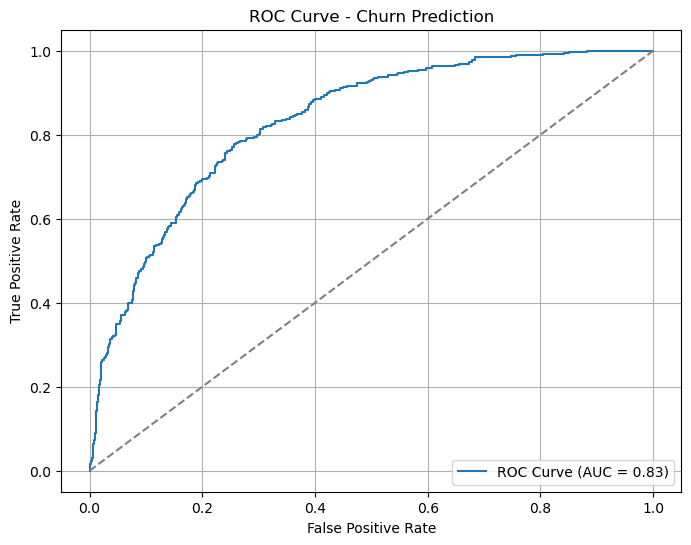

In [58]:
# Get predicted probabilities for the positive class (churn = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Precision-Recall Curve

While the ROC curve shows how well the model separates classes, the precision-recall curve focuses on how well it identifies the positive (churn) class. This is especially valuable in imbalanced datasets where we care more about correctly catching the minority class.


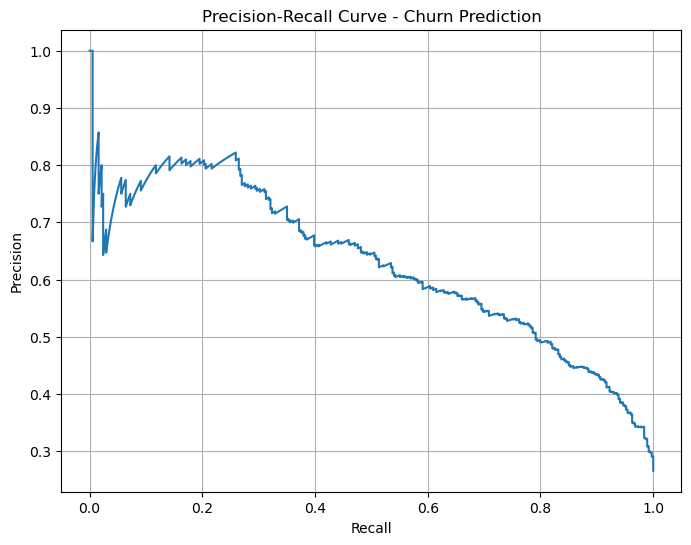

In [60]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Churn Prediction')
plt.grid(True)
plt.show()

## Model Evaluation: Logistic Regression

### Classification Report

The logistic regression model performed well in terms of identifying churners, particularly with high recall, but showed moderate precision. 

Accuracy: 73%

Observation: The model correctly identifies most churners (high recall), but also misclassifies some non-churners as churners (lower precision).

### ROC Curve

AUC = 0.83, which indicates strong model performance.

The ROC curve is well above the diagonal baseline, showing the model is effective at distinguishing churn vs. non-churn.

Higher AUC values mean better model separability, and anything over 0.80 is typically considered very good.

### Precision-Recall Curve

This curve helps evaluate performance on the minority class (churn = Yes).

The curve shows a natural trade-off between precision and recall:

At higher recall levels (catching more churners), precision drops.

At higher precision levels (being more sure when predicting churn), fewer actual churners are caught.

The model performs best in the mid-recall range (~0.4–0.7), balancing a decent number of true churners with acceptable precision.

### Summary

The model is strong at detecting churners (recall = 0.79).

It would be useful in a real business scenario where catching potential churners early is more important than perfect accuracy.

However, due to moderate precision, additional filtering or business rules may be needed to avoid wasting resources on false churn predictions.

> **Logistic Regression Highlights**
> - Accuracy: 73%
> - Recall (Churn): 79%
> - Precision (Churn): 50%
> - ROC-AUC: 0.83


# Setting Up the Random Forest Model

## Training the model

In [72]:
rf_model = RandomForestClassifier(
    n_estimators = 100,
    class_weight = 'balanced',
    random_state = 42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Model Evaluation: Random Forest

### Classification Repot


In [74]:
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[933 100]
 [192 182]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The Random Forest model achieved higher overall accuracy (79%) and strong precision (65%) for the churn class, but lower recall (49%) compared to Logistic Regression.

This suggests the model is **more confident** in the churn predictions it makes (fewer false positives), but **misses more actual churners** — a tradeoff between precision and recall.


In [149]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

### ROC-AUC Score


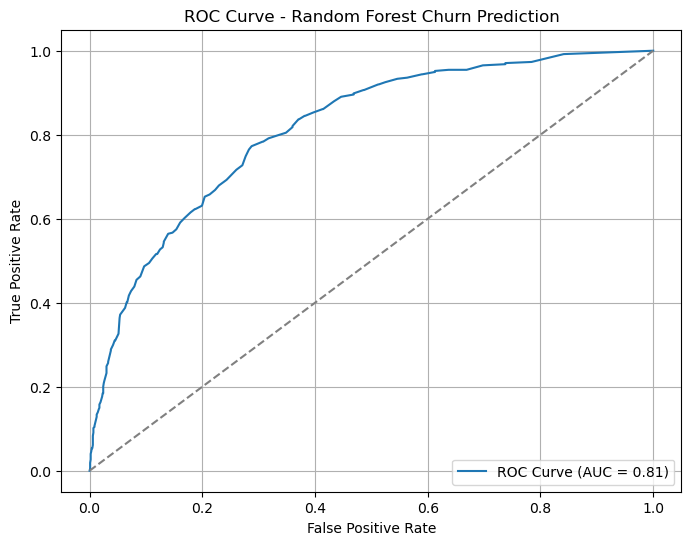

In [77]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Churn Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Precision-Recall Curve

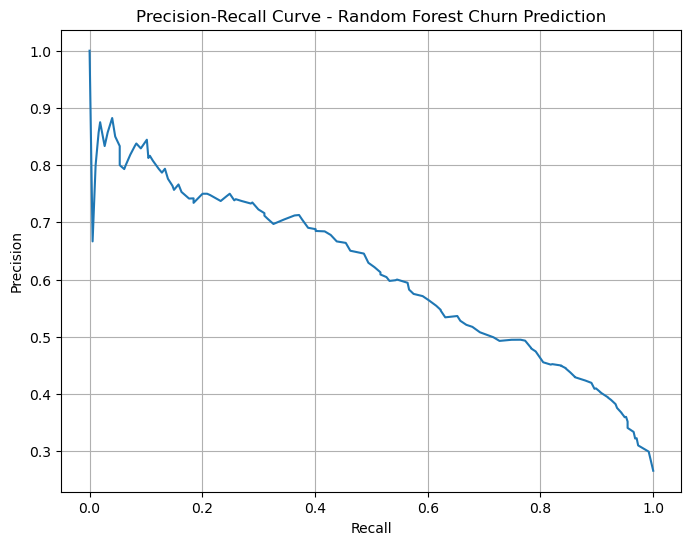

In [79]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Churn Prediction')
plt.grid(True)
plt.show()

In [80]:
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Random Forest ROC-AUC Score: 0.8134049624426027


### Feature Importance Interpretation – Random Forest

The Random Forest model highlights the most influential factors contributing to customer churn:

- **TotalCharges**, **MonthlyCharges**, and **tenure** are the top three predictors, suggesting that billing behavior and customer lifecycle stage are key indicators of churn risk.
- **Contract type** also plays a major role: customers on **Two-year contracts** are less likely to churn compared to month-to-month subscribers.
- **InternetService_Fiber optic** appears as a strong factor, potentially linked to service expectations or pricing.

This insight helps businesses focus on financial engagement and subscription terms when crafting retention strategies.


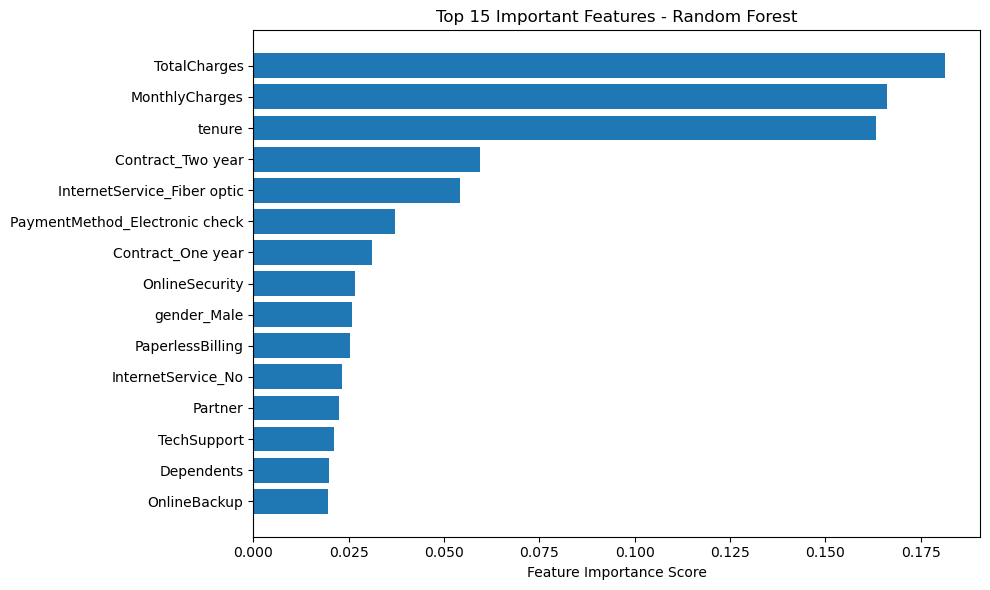

In [82]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:15][::-1], feature_importance['Importance'][:15][::-1])
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()

# Random Forest Evaluation and Interpretation

After training a Random Forest classifier to predict customer churn, I evaluated the model using multiple performance metrics and visualizations.

## ROC Curve

The ROC curve shows strong model performance with an **AUC score of 0.81**.

The curve is well above the diagonal baseline, meaning the model effectively separates churners from non-churners.

This indicates **high true positive rates** even at relatively low false positive rates.

---

## Precision-Recall Curve

The curve displays the **trade-off between precision and recall** across classification thresholds.

It maintains good precision in the **moderate-recall zone (~0.4–0.6)**, which is valuable for targeting churners without too many false alarms.

The decline in precision at higher recall levels is expected and reflects **natural model uncertainty** with broader predictions.

---

## Top 15 Feature Importances

The most influential features driving churn prediction were:

- `TotalCharges`
- `MonthlyCharges`
- `tenure`
- `Contract_Two year`
- `InternetService_Fiber optic`

These results are business-aligned:

- Customers with **high monthly/total charges** and **short tenure** are more likely to churn.
- **Two-year contracts** and **fiber optic service** play a major role in retention patterns.

---

## Summary

| Metric            | Logistic Regression | Random Forest |
|-------------------|---------------------|----------------|
| Accuracy          | 73%                 | 79%            |
| Churn Recall      | 79%                 | 49%            |
| Churn Precision   | 50%                 | 65%            |
| ROC-AUC           | 0.83                | 0.81           |

---

- **Random Forest improves precision** significantly while maintaining a strong AUC.
- **Logistic Regression excels at recall**, making it better at catching churners but with more false alarms.
- Choice depends on business goals:
  - **Recall-heavy** for proactive outreach
  - **Precision-heavy** for targeted retention campaigns
*Precision-heavy** for targeted retention campaigns


---

## Model Optimization: Improving Random Forest

To further improve the model’s performance, especially recall, we will apply hyperparameter tuning using `RandomizedSearchCV`. This allows us to search for a more optimal combination of parameters to reduce false negatives while maintaining strong precision.

### Why Focus on Random Forest?
While Random Forest already outperforms Logistic Regression in precision (65% vs. 50%), its recall is lower. Tuning offers a way to shift that balance while preserving overall accuracy and ROC-AUC.

### Parameters to Tune:

- `n_estimators`:  
  The number of trees in the forest. More trees can improve performance but also increase training time. Each tree "votes," and the final prediction is based on the majority vote, so more trees generally mean more stable predictions.

- `max_depth`:  
  The maximum depth of each tree. Deeper trees can capture more complex patterns but are also more prone to overfitting. Limiting depth helps generalize better to new data.

- `min_samples_split`:  
  The minimum number of samples required to split an internal node. Increasing this makes the model more conservative (less complex).

- `min_samples_leaf`:  
  The minimum number of samples required to be at a leaf node. This also helps prevent trees from modeling noise in the data.

- `max_features`:  
  The number of features to consider when looking for the best split. Limiting this introduces randomness and can reduce overfitting.

- `class_weight`:  
  Kept as `'balanced'` to give higher weight to the minority class (churners), helping the model pay more attention to them during training.


This step aims to make Random Forest more suitable for both precision-heavy and recall-heavy strategies.

---


## Define The Parameter Grid

In [165]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

## Set Up GridSearchCV

In [168]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

## Review The Best Model

In [171]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC Score: 0.8494384024229271


## Use the Best Estimator To Predict And Evaluate

In [175]:
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
y_proba_rf_best = best_rf_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf_best))

[[793 240]
 [110 264]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407

ROC-AUC Score: 0.8309943003867039


### Random Forest Performance After Hyperparameter Tuning

| Metric             | Before Tuning | After Tuning |
|--------------------|---------------|--------------|
| Accuracy           | 79%           | 75%          |
| Churn Recall       | 49%           | 71%          |
| Churn Precision    | 65%           | 52%          |
| ROC-AUC            | 0.81          | 0.83         |

**Interpretation:**
- **Recall improved significantly** from 49% → 71%, making the model much better at catching actual churners.
- **Precision dropped slightly**, but remains within an acceptable range for many business use cases.
- **Overall model quality (ROC-AUC)** remains high at 0.83, indicating strong separability.
- This tuned model is better suited for **recall-heavy** strategies like proactive churn prevention outreach.



##  Business Questions Answered

1. Who is likely to churn?

Our predictive models (Logistic Regression and Random Forest) were able to identify customers at risk of churn with good performance.

#### Model Comparison (Before Tuning):

- **Logistic Regression:** ROC-AUC = 0.83
- **Random Forest (original):** ROC-AUC = 0.81  
  - Precision: 65%  
  - Recall: 49%

#### Random Forest After Tuning:

- **Tuned ROC-AUC:** 0.83  
- **Precision (Churn):** 52%  
- **Recall (Churn):** 71%

**Business Impact:**  
After tuning, the Random Forest model is now much more effective at **identifying actual churners** (71% recall), with only a modest drop in precision. This makes it more suitable for **proactive outreach** strategies where missing a churner is more costly than a false alarm.

We can now more confidently identify customers likely to churn and target them with retention offers, loyalty perks, or outreach strategies.

###  2. What factors influence churn the most?

Top features from the Random Forest model:

- `TotalCharges`
- `MonthlyCharges`
- `tenure`
- `Contract_Two year`
- `InternetService_Fiber optic`

**Business Impact**:  
Understanding these drivers helps the business:  
- Adjust pricing or bundle offerings  
- Promote longer contract options  
- Provide support tools to reduce dissatisfaction  

---

| **Business Question**                | **Answer from Project**                                                                                      |
|-------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Who is likely to leave?             | A predictive model with 0.81–0.83 AUC identifies churners with solid performance.                            |
| How confident are we in predictions?| After tuning, churn **recall improved to 71%** (from 49%) with a **slight drop in precision** (from 65% to 52%). |
| What causes churn?                  | Charges, short tenure, contract type, and service setup (e.g., fiber) are key factors.                       |
| What actions can be taken?          | Launch retention campaigns, promote support tools, adjust pricing and contract terms.                        |

---

### Conclusion

This project provides the business with both:

- A **predictive tool** that now more effectively identifies customers at risk of churn.
- And **actionable insights** to reduce churn by targeting root causes.

After tuning, the model significantly improved **recall (71%)**, making it well-suited for **proactive outreach** where identifying actual churners is crucial—even if it means accepting a few more false positives.

These insights can help reduce churn, improve retention campaign ROI, and increase customer lifetime value by acting on the top features influencing behavior.